# **Problem Statment**
The  objective of the study is to utilise simple linear regression to predict the salary of an individual depending on the number of years of experience.

Import Data


In [11]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Data science/Simple Linear Regression/Salary_Data.csv")

In [12]:
# checking the headed loaded properly
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Exploratory Data Analysis**

In [13]:
data.shape

(30, 2)

The data have 2 column (Years Experience , Salary) and 30 rows (conatins details of indiavuals Salary and Years Experience) in it.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


When we checked the info of the data both YearsExperience and Salary is float64 Data type.

In [15]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

When the null value is checked, it is found that neither the Salary nor the YearsExperience data contain any null values.

In [16]:
import plotly.express as px


fig_1 = px.histogram(data, x="YearsExperience",title="Work experience of the current employee")
fig_1.update_layout(bargap=0.2)
fig_1.show()

With the help of plotly, histogram is plotted. With xaxis= YearsExperience, yaxis= count and Work experience of the current employee as the title of the histogram. 30 individuals has been divided and placed into each group based on the years of experience. We can find that 2 individuals have the highest years of experience ranging from 10-11.9 years of experience and the 3 individuals have least number of experience ranging from 0-1.9 years. Most of the individuals are in the group who had experience ranging from 2-5.9 years of experience with maximum of 16 individuals. 

In [17]:
fig_2 = px.histogram(data, x="Salary",title= "Salary of other current employee")
fig_2.update_layout(bargap=0.2)
fig_2.show()

With the help of plotly, histogram is plotted. With xaxis= Salary, yaxis= count and Salary of the current employee as the title of the histogram. 30 individuals has been divided and placed into each group based on the salary that they recive. We found out that 2 of the current employees recives salary ranging from 120k-139.9k as the highest and the lowest salary that the current employee recives reanging from 20k-39.9k. 

In [18]:
# x and y given as array_like objects
import plotly.express as px
fig_3 = px.scatter(data,x="YearsExperience",y="Salary",title="Relation bewtween Years of experience and salary")
fig_3.show()

Using plotly, a scatter plot is generated.  The title of the scatter plot is presented as the relationship between the current employee's years of experience and salary. On the xaxis current employee's years of experience and the current employee's salary on the yaxis, respectively. We discovered that existing employees' salaries increase in direct proportion to their years of experience. We can understand from the graph that it is a positive linear relation.

# **Simple Linear Regression Model**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=data[["YearsExperience"]]
y=data[["Salary"]]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 49830096.86


Xaxis (YearsExperience) and Yaxis (Salary) are provided to the model together with the imported skylearn model to determine the estimated error in the model. Then, we divide the content of the x and y axes into x_train and x-test and y_train and y-test, with a test size of 20% and a random number, respectively. A model is built when we train X-train and Y_train. In that model, we train using x_test, and the output is y-pred. We discovered a 49 percent inaccuracy in the model when the projected value (y_pred) is subtracted from the y-test value.

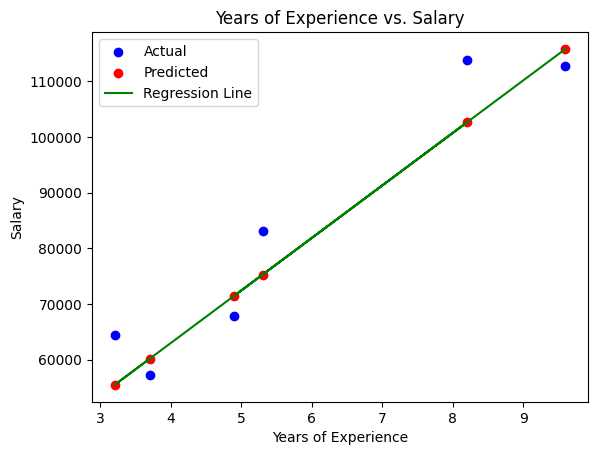

In [20]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X_test['YearsExperience'], y_test, color='blue', label='Actual')
plt.scatter(X_test['YearsExperience'], y_pred, color='red', label='Predicted')

# Regression line
plt.plot(X_test['YearsExperience'], y_pred, color='green', label='Regression Line')

# Axes labels
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Title and legend
plt.title('Years of Experience vs. Salary')
plt.legend()

# Show the plot
plt.show()

We create a scatter plot graph in which the actual value and predicted value are shown. The lines of predicted value are also displayed with a regression. With the aid of the graph, we can determine that the regression is positive and has a 49 percent error between the actual and projected values. In order to lower model error, our goal is to add additional data to the model.